In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import statsmodels.api as sm
from math import pi

In [2]:
pob = pd.read_csv('data/poblacion.csv ') # carga de datos poblacionales 1952 - 2007


In [3]:
print(pob.head()) #Mostrando las cabeceras de los datos poblacionales
print('#############################')
print ('Cantidad de filas y columnas ', pob.shape)
print('#############################')
print ('Nombre de las columnas', pob.columns)

       country  year  population
0  Afghanistan  1952     8425333
1  Afghanistan  1957     9240934
2  Afghanistan  1962    10267083
3  Afghanistan  1967    11537966
4  Afghanistan  1972    13079460
#############################
Cantidad de filas y columnas  (1704, 3)
#############################
Nombre de las columnas Index(['country', 'year', 'population'], dtype='object')


In [4]:
pob.describe() #Descripción general de los datos minimo, maximo, etc

,year,population
count,1704.00000,1.704000e+03
mean,1979.50000,2.960121e+07
std,17.26533,1.061579e+08
min,1952.00000,6.001100e+04
25%,1965.75000,2.793664e+06
50%,1979.50000,7.023596e+06
75%,1993.25000,1.958522e+07
max,2007.00000,1.318683e+09


     country  year  population
132  Bolivia  1952     2883315
133  Bolivia  1957     3211738
134  Bolivia  1962     3593918
135  Bolivia  1967     4040665
136  Bolivia  1972     4565872


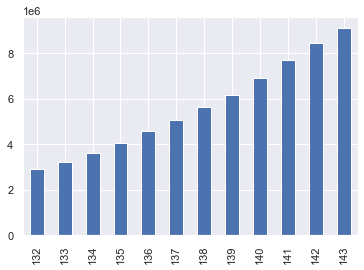

In [5]:
pob_Bob = pob[pob["country"] == 'Bolivia'] # Filtrando a Bolivia de la lista de datos poblacionales 
print(pob_Bob.head()) #Viendo las primeras 3 lineas
pob_Bob.drop(['country'],axis=1)['population'].plot(kind='bar') #quitando la cabecera 'country' elegiendo el eje 1 y dibujando
                                                                #el crecimiento de poblacion segun cada 2 años 
#Filtrando a los paises a ser comparados con Bolivia en los ultimos 55 años
pob_Pe = pob[pob["country"] == 'Peru']
pob_Ar = pob[(pob["country"] == 'Argentina')]
pob_Br = pob[(pob["country"] == 'Brazil')]
pob_Ve = pob[(pob["country"] == 'Venezuela')]

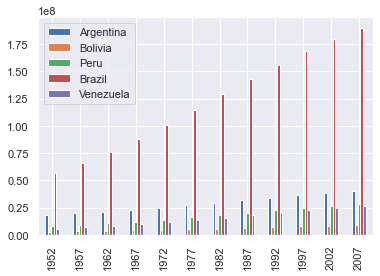

In [6]:
anios = pob_Bob['year'].unique() #los años van en el eje x
pop_ar = pob_Ar['population'].values #Valores poblacionales de Argentina
pop_bo = pob_Bob['population'].values #Valores poblacionales de Bolivia
pop_pe = pob_Pe['population'].values  #Valores poblacionales de Peru
pop_bra = pob_Br['population'].values #Valores poblacionales de Brasil 
pop_ve = pob_Ve['population'].values  #Valores poblacionales de Venezuela
 
df_plot = pd.DataFrame({'Argentina': pop_ar,'Bolivia': pop_bo, 'Peru': pop_pe, 'Brazil': pop_bra, 'Venezuela': pop_ve}, index=anios)
df_plot.plot(kind='bar') #Grafica de paises y su crecimiento en millones entre 1952 - 2007 ==> '55 años'

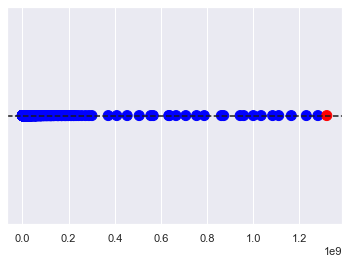

In [7]:
#Analizando la mayor concentración de población, mediante outliers
pob = pd.read_csv('data/poblacion.csv ')['population']
population_unique, counts = np.unique(pob, return_counts=True)
 
sizes = counts*100
colors = ['blue']*len(population_unique)
colors[-1] = 'red'
 
plt.axhline(1, color='k', linestyle='--')
plt.scatter(population_unique, np.ones(len(population_unique)), s=sizes, color=colors)
plt.yticks([])
plt.show()

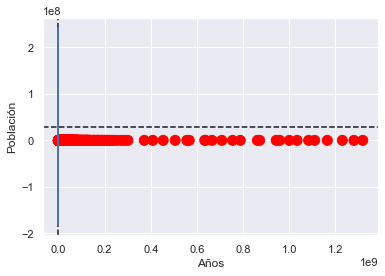

In [30]:
# pob = pd.read_csv('data/poblacion.csv ')['population']
anios = pd.read_csv('data/poblacion.csv')['year']
media_pob = pob.mean()
std_pob_x = pob.std()*2
media_anios = anios.mean()
std_anios_y = anios.std()*2
colors = ['blue']*len(pob)
for index, x in enumerate(pob):
    if abs(x-media_pob)>std_pob_x:
       colors[index] = 'red'
        
for index, x in enumerate(anios):
    if abs(media_anios)>std_anios_y:
       colors[index] = 'red'

plt.scatter(pob, anios, s = 100,color = colors)
plt.axhline(media_pob, color = 'k', linestyle = '--')
plt.axvline(media_anios, color ='k', linestyle = '--')

v=media_pob
u=media_anios
b=std_pob_x
a=std_anios_y

t= np.linspace(0,2*pi, 100)
plt.plot(u+a*np.cos(t), v+b*np.sin(t))

plt.ylabel('Población')
plt.xlabel('Años')
plt.show()
